In [1]:
import numpy as np
import math
import matplotlib.pylab as pyplt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


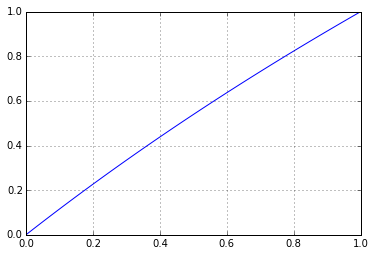

In [2]:
#This notebook implements a logarithmic mesh refinement of the unit 
alpha = 1.
x = np.linspace(0.00,1,100)
#y1 = exp(x)
y2 = (log(alpha*x + math.e) - 1)*(1/(log(alpha + math.e) - 1))
#pyplot.plot(x, y1)
pyplot.plot(x, y2)
pyplot.grid()

In [3]:
# RT PIC - classic and nearest neighbour
import underworld as uw
import math
from underworld import function as fn
import glucifer.pylab as plt
import numpy as np
import os
from shapely.geometry import Polygon
from shapely.geometry import Point

In [13]:
dim = 2

meshX = 64
meshY = 64

In [14]:
# create mesh objects
elementMesh = uw.mesh.FeMesh_Cartesian( elementType='Q1/dQ0', 
                                         elementRes=(meshX, meshY), 
                                           minCoord=(0.,0.), 
                                           maxCoord=(2.,1.0))
linearMesh   = elementMesh
constantMesh = elementMesh.subMesh

In [15]:
# create fevariables
velocityField    = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=dim )
pressureField    = uw.fevariable.FeVariable( feMesh=constantMesh, nodeDofCount=1 )
temperatureField = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=1 )

In [16]:
for index, coord in enumerate(linearMesh.data):
    if coord[1] < 0.7:
        temperatureField.data[index] = 0.5  
    else:
        temperatureField.data[index] = 1. - coord[1]
    

In [17]:
(log(0 + 0.001)/alpha + 1) + abs((log(0.0 + 0.001)/alpha + 1))

0.0

In [18]:
alpha = 1.
newys = []
for index, coord in enumerate(linearMesh.data):
    y0 = coord[1]
    newy = (log(alpha*y0 + math.e) - 1)*(1/(log(alpha + math.e) - 1))
    newys.append(newy)
    print y0,newy

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015625 0.0182967120213
0.015

In [19]:
linearMesh.data[:,1]

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

In [20]:
with linearMesh.deform_mesh():
    linearMesh.data[:,1] = newys
    linearMesh.data[:,1]

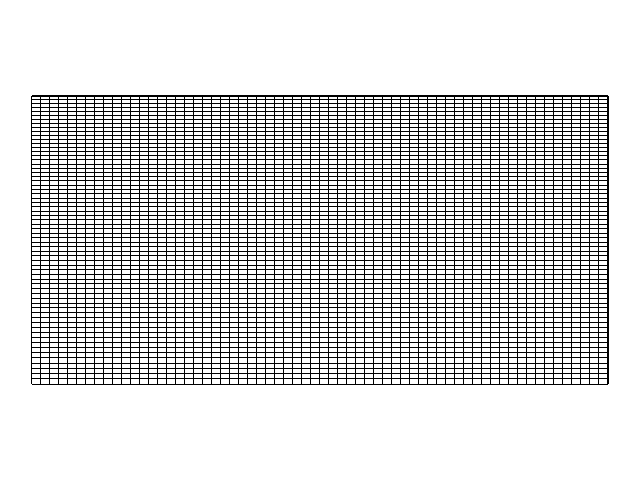

In [21]:

    
figtemp = plt.Figure()
#figtemp.Surface(temperatureField, elementMesh)
#figtemp.Surface(indexField, elementMesh)
figtemp.Mesh(linearMesh, colourBar=False)
figtemp.show()

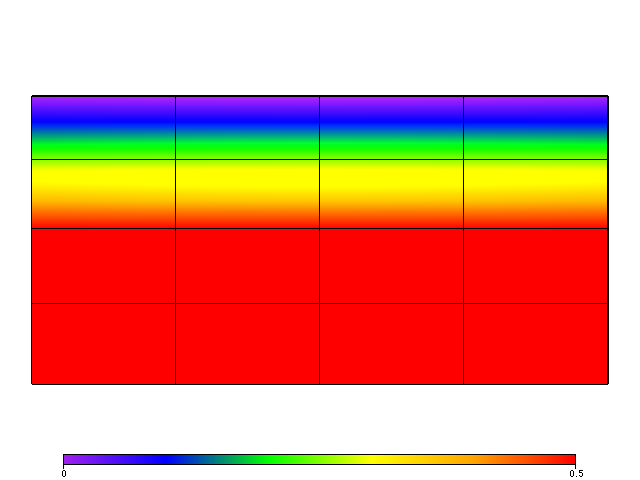

In [14]:
figtemp = plt.Figure()
figtemp.Surface(temperatureField, elementMesh)
#figtemp.Surface(indexField, elementMesh)
figtemp.Mesh(linearMesh, colourBar=False)
figtemp.show()

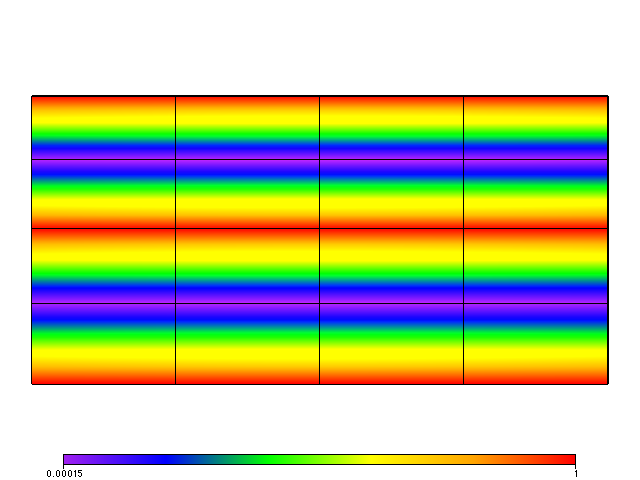

In [15]:
indexField = uw.fevariable.FeVariable( feMesh=linearMesh, nodeDofCount=1)

for index, coord in enumerate(linearMesh.data):
#     indexField.data[index] = ((index % (meshX+1)) % 2 ==0)
    indexField.data[index] = ((index/(meshX+1) % (meshY+1)) % 2 ==0)


figindex = plt.Figure()
figindex.Surface(indexField, elementMesh)
figindex.Mesh(linearMesh, colourBar=False)
figindex.show()

In [205]:
indexField.evaluate((0.5,0.26))

array([[-0.08081729]])

In [206]:
linearMesh._cself.isRegular

1